# OOP: Hopping Scan

In [1]:
import sys
sys.path.append("..")

from sicm import io, analysis
from sicm.plots import plots
from sicm.experiments.scan import Scan
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
datadir = r"S:\UsersData\Martin\2019\05_May\14\scan20"
exp_name = "scan20"
scan = Scan( datadir, exp_name, scan_type = "scan")
# scan = Scan(datadir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/04_April/30" \
#             + "/scan10", exp_name = "scan10")

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'X(um)', 'Y(um)', 'Z(um)'])
Number of datapoints = (892887,)
Number of datapoints = 626
Veryfying X, Y extents:
xmax: 51.96816328, xmin: 50.51976996,
ymax: 50.03361661, ymin: 48.51479737
xdiff: 1.448393320000001, ydiff: 1.5188192400000062


Saved figure to S:\UsersData\Martin\2019\03_Mar\15\sicm\scan7\scan7_15032019_1534_sicmPlot.
Saved figure to S:\UsersData\Martin\2019\03_Mar\15\sicm\scan7\scan7_15032019_1534_sicmPlotLockin.


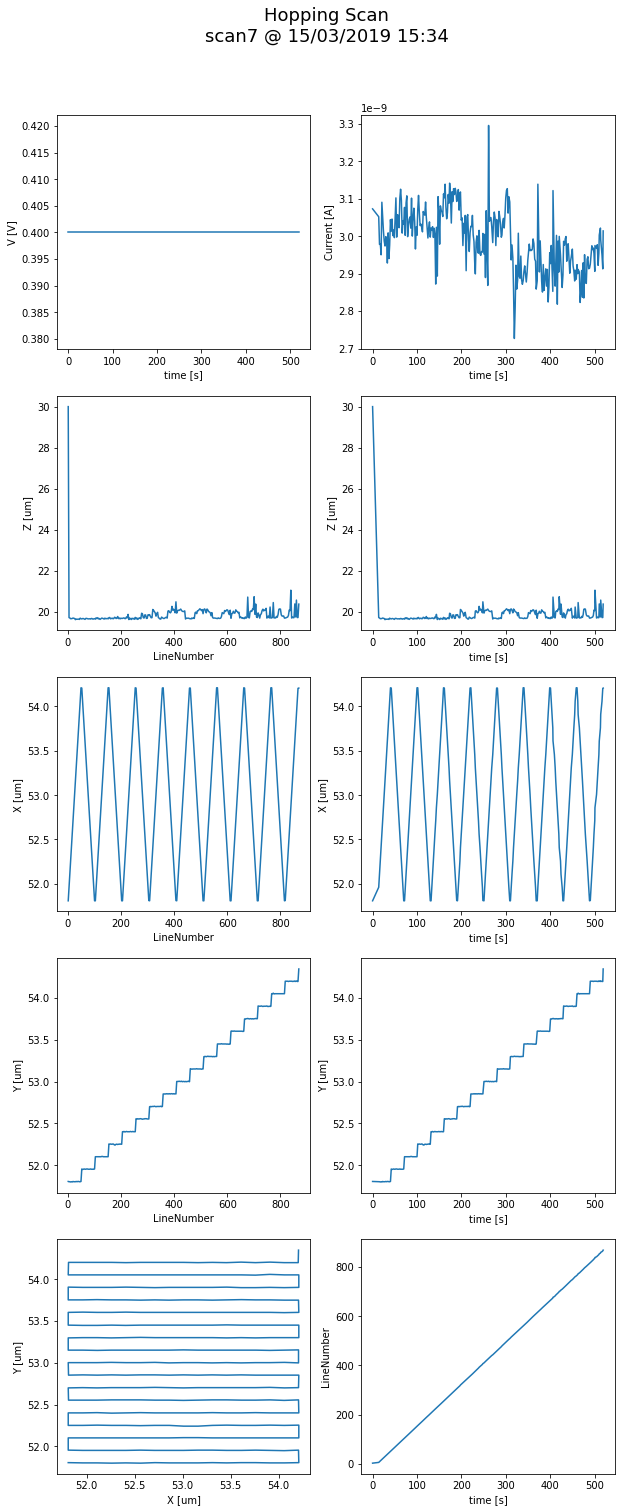

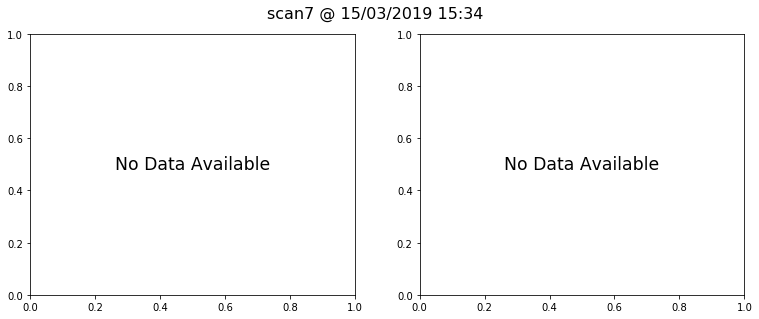

In [7]:
scan.plot_hopping_scan(mark_points = False)

Selected approach @ X:50.824, Y:48.826 um
Saved figure to S:\UsersData\Martin\2019\05_May\14\scan20\scan20_14052019_1626_approachX50p824Y48p826_T.


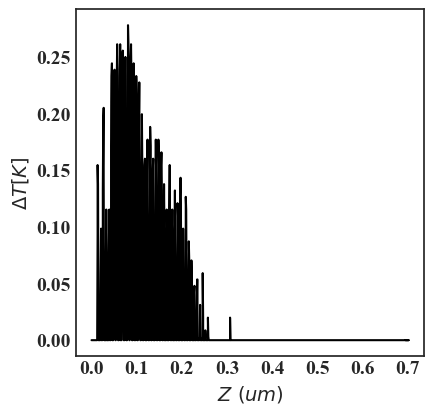

In [6]:
scan.plot_approach(location = (50.824, 48.826), relative = True, convert = True)

Saved figure to S:\UsersData\Martin\2018\12_Dec\12\sicm\exp1\scan_hopping_qtf_current_12122018_1722.


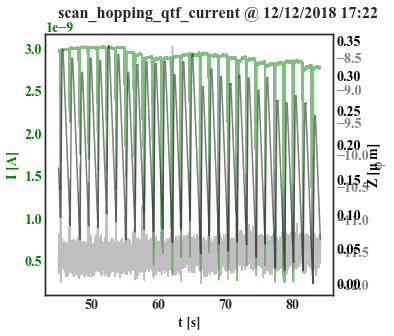

In [5]:
scan.plot_hops([45.0, 90.0])

Saved dataframe to S:\UsersData\Martin\2019\06_June\28\scan1\scan1_annot.pkl.


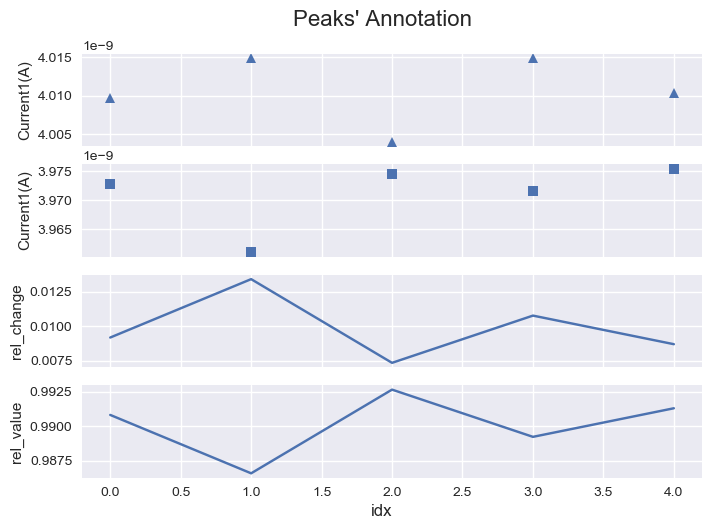

In [7]:
scan.annotate_peaks(sel = [20.0, 40.0], window_size=50)

## Additional functionality

#### Looking at selected line
Used for debugging line-by-line artifacts

In [6]:
# # Select a line to look at
# axis = "X"
# ax_vals = np.unique(scan.dsdata["{}(um)".format(axis)])
# print(ax_vals)
# diff = np.mean(np.abs(np.diff(ax_vals)))
# coord = 45.01
# sel = np.where(np.logical_and(
#                         scan.dsdata["{}(um)".format(axis)] > coord - (diff - 0.2*diff),
#                         scan.dsdata["{}(um)".format(axis)] < coord + (diff - 0.2*diff)))[0]

[44.00769066 56.01062044 56.01367229]


X(um) = 45.011


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


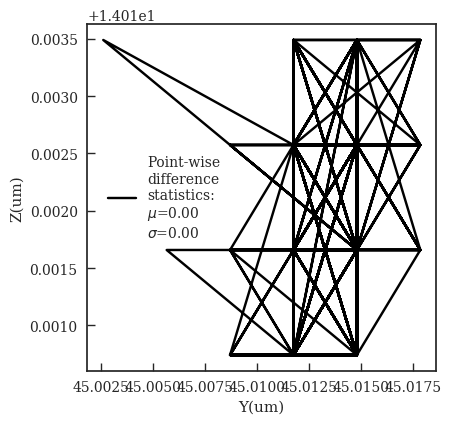

In [39]:
# Show single line once more separately
axis2 = "X" if axis == "Y" else "Y"
print("{}(um) = {:.3f}".format(axis, 
                               np.mean(scan.dsdata["{}(um)".format(axis)][sel])))
leg = "Point-wise difference statistics:\n$\mu$={:.2f}\n$\sigma$={:.2f}".format(
    np.mean(np.abs(np.diff(scan.dsdata["Z(um)"][sel].flatten()))),
    np.std(np.abs(np.diff(scan.dsdata["Z(um)"][sel].flatten()))))
plots.plot_generic([scan.dsdata["{}(um)".format(axis2)][sel]],
                  [scan.dsdata["Z(um)"][sel]],
                  ["{}(um)".format(axis2)], ["Z(um)"], leg)

#### Determining Line Number
Used when unsure which line number to plot

In [228]:
import numpy as np
uniqs, cnts = np.unique(scan._data["LineNumber"], return_counts=True)
sel = np.nonzero(np.in1d(scan._data["LineNumber"],
                         np.append(np.arange(6, np.max(uniqs), 6),
                                  np.arange(6, np.max(uniqs), 6))))[0]
 plots.plot_sicm(scan._data, sel)

#### Retreact Distance Statistics

Used for debugging issues with approaches.

In [18]:
ln_diffs = []
for ln in np.unique(scan.data["LineNumber"])[:-1]:
    ln1 = scan.data["Z(um)"][scan.data["LineNumber"] == ln][-1]
    ln2 = scan.data["Z(um)"][scan.data["LineNumber"] == ln + 3.0][0]
    ln_diffs.append(np.abs(ln2 - ln1))
print("Retract distance statistics:\n" + \
      "$\mu$={:.4f}\n$\sigma$={:.2f}".format(np.mean(ln_diffs), np.std(ln_diffs)))

Retract distance statistics:
$\mu$=0.7961
$\sigma$=0.00


---

# OOP: Approach

In [23]:
import sys
sys.path.append("..")
import os

from sicm import io, analysis
from sicm.plots import plots
from sicm.sicm import Approach, Signal, ApproachList
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
datadir =  r"S:\UsersData\Martin\2019\05_May\14\approach1"
exp_name = "approach1"
# datadir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/05_May/07"
# datadir = datadir + "/approach2"
# exp_name = "approach2"
app = Approach(datadir, exp_name)
# this is very simplistic but does the job for now.
# app. plot()

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (63654,)


Saved figure to S:\UsersData\Martin\2019\05_May\14\approach1\approach1.pdf.


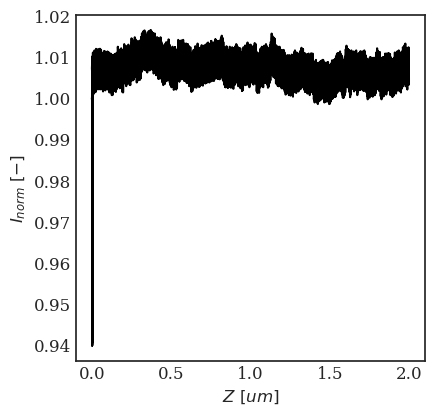

In [27]:
x, y = app.get_xy_data(scale = True)
sel = np.logical_and(x < 2, y > 0.94)
app.plot(sel, convert = False, scale = True, bulk_adjust = False, window_size = 0)

Saved figure to S:\UsersData\Martin\2019\03_Mar\29\approaches\approach4.pdf.


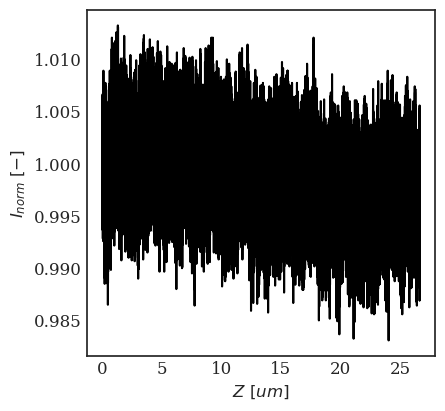

In [20]:
app.plot(convert = False, scale = True, bulk_adjust = False, window_size = 0)

Saved figure to S:\UsersData\Martin\2019\05_May\15\approach3\approach3.pdf.


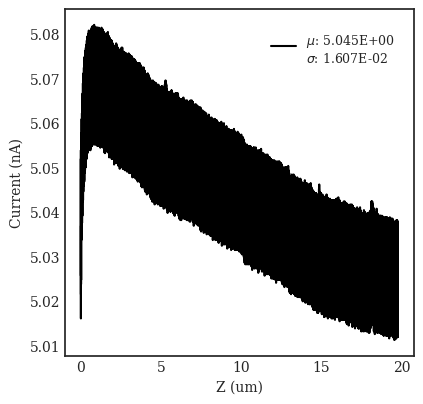

In [7]:
t_ax = np.cumsum(app.dsdata["dt(s)"])
z_ax = app.dsdata["Z(um)"]
c_ax = app.dsdata["Current1(A)"]*1e9

# sel = np.nonzero(np.logical_and(t_ax > 0., t_ax < 46.898)) 
sel = [True] * len(t_ax)
# sel = np.nonzero(c_ax > 3.5)[0]

sig = Signal(z_ax[sel] - np.min(z_ax[sel]), c_ax[sel], 
             datadir, exp_name)
# sig.analyze(range = [0., 50.0], what = "psd")
sig.plot("Z (um)", "Current (nA)")

# Approach List

In [2]:
applist = ApproachList(["S:\\UsersData\\Martin\\2019\\05_May\\15\\approach2"],
                      ["1", "4"])
# applist = ApproachList(["/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/05_May/07/approach_set"],
#                       ["1", "2"])

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (13938,)
Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (10502,)


In [3]:
stitchapp = applist.stitch(z_move = 20, preserve_overlap = True)
[v.shape for v in stitchapp.dsdata.values()]

[(24440,), (24440,), (24440,), (24440,), (24440,), (24440,)]

Saved figure to S:\UsersData\Martin\2019\05_May\15\approach2\1-4.pdf.


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


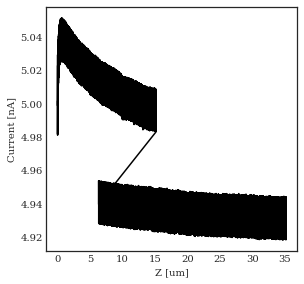

In [4]:
# sel = stitchapp.dsdata["Current1(A)"]*1e9 > 4
sel = None
stitchapp.plot(sel = sel, what = "generic")

# Getting noise level

In [90]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np
from os import path

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Do it from `Watch Current` Data

In [161]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/pdms/10nm"
exp_name = "watchcurrent_noisepattern"
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['V1(V)', 'LineNumber', 'Current1(A)', 'dt(s)'])
Number of datapoints = (54798,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\21\steph_plasmacleaned\watchcurrent_noisepattern_psd.pdf.


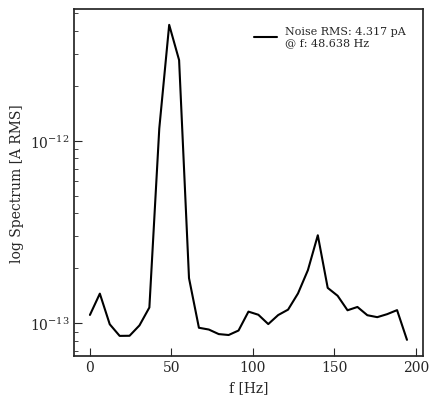

In [164]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
fpath = path.normpath(path.join(datadir, exp_name))
sig.analyze(what = "psd", fpath = fpath, range = [60.0, 130.0])

## Do it from `Approach Data`

In [121]:
datadir = "S:\\UsersData\\Martin\\2019\\04_April\\11\\scan3"
exp_name = "scan3"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)
fpath = path.normpath(path.join(datadir, exp_name))

# get idea of range to plot
# plots.plot_hopping_scan(result_, None, exp_name, date)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'LockinPhase', 'LockinAmplitude', 'V1(V)', 'X(um)', 'Y(um)', 'Z(um)'])
Number of datapoints = (474115,)


Saved figure to S:\UsersData\Martin\2019\04_April\11\scan3\scan3_psd.pdf.


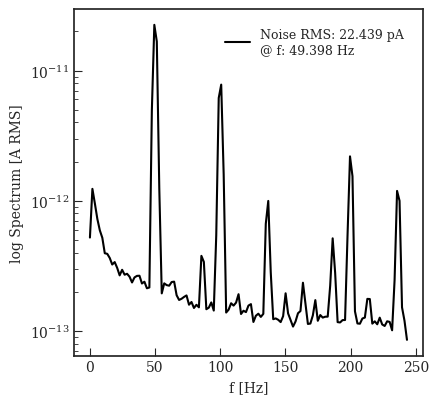

In [135]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.analyze(what = "psd", fpath = fpath, range = [0.5, 20.])

# Signal

In [1]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
datadir = r"S:\UsersData\Martin\2019\06_June\28\current_data_noise"
exp_name = "current_data_noise"

# datadir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/20/tip_current_2um"
# exp_name = "11"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)'])
Number of datapoints = (36244,)


### Usual Plotting, with scaling

Saved figure to S:\UsersData\Martin\2019\06_June\28\current_data_noise\current_data_noise.svg.


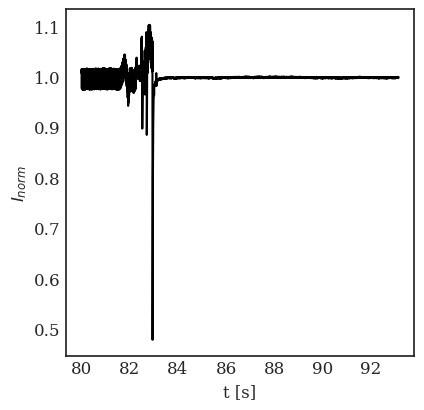

In [8]:
# sel = np.argwhere(result_["Current1(A)"] > 1e-9)

t_ax = np.cumsum(result_["dt(s)"])
c_ax = result_["Current1(A)"]

# sel1 = np.nonzero(np.logical_and(t_ax > 10.5, t_ax < 12.5))[0]
# t_ax = t_ax[sel1]
# c_ax = c_ax[sel1]

t_ax0 = t_ax - t_ax.min()
scaler = np.quantile(c_ax[np.nonzero(t_ax0 < 250e-3)[0]], 0.5)
c_ax = c_ax / scaler
            
# idx = np.argmax(np.abs(np.diff(c_ax)))
# t_ax -= t_ax[idx]

sel = t_ax > 80
t_ax = t_ax[sel]
c_ax = c_ax[sel]

sig = Signal(x = t_ax,  y = c_ax,
            datadir = datadir, exp_name = exp_name)
sig.plot("t [s]", r"$I_{norm}$", legend = "")

### Narrow Window With Gradient

Saved figure to S:\UsersData\Martin\2019\05_May\15\watch_current_off\watch_current_off.pdf.


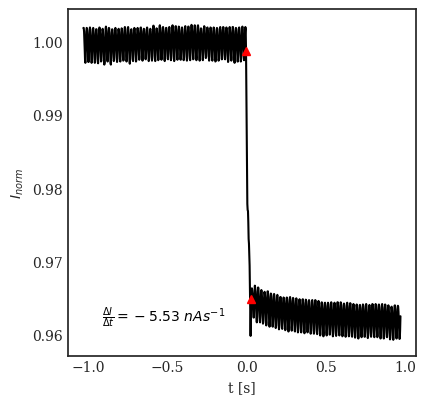

In [85]:
# sel = np.argwhere(result_["Current1(A)"] > 1e-9)

t_ax = np.cumsum(result_["dt(s)"])
c_ax = result_["Current1(A)"]

sel1 = np.nonzero(np.logical_and(t_ax > 10.5, t_ax < 12.5))[0]
t_ax = t_ax[sel1]
c_ax= c_ax[sel1]

t_ax0 = t_ax - t_ax.min()
scaler = np.quantile(c_ax[np.nonzero(t_ax0 < 250e-3)[0]], 0.5)
c_ax = c_ax / scaler

sel = np.arange(np.argmax(np.abs(np.diff(c_ax))) - 10, 
                np.argmax(np.abs(np.diff(c_ax))) + 15)

# c_ax = c_ax[sel]
# t_ax = t_ax[sel]
            
idx = np.argmax(np.abs(np.diff(c_ax)))
t_ax -= t_ax[idx]

idx1 = np.argmin((np.diff(c_ax)))-2
idx2 = np.argmax((np.diff(c_ax)))+1
t_ax = [t_ax, t_ax[[idx1, idx2]]]
c_ax = [c_ax, c_ax[[idx1, idx2]]]

grad = 1e9*scaler*(c_ax[0][idx2] - c_ax[0][idx1]) / (t_ax[0][idx2] - t_ax[0][idx1])
txt = r"$\frac{{\Delta I}}{{\Delta t}}={:.2f}\ nAs^{{-1}}$".format(grad)

sig = Signal(x = t_ax,  y = c_ax,
            datadir = datadir, exp_name = exp_name)
sig.plot("t [s]", r"$I_{norm}$", legend = "", fmts = ["-k", "^r"], text = txt)

# CV

In [12]:
import sys
sys.path.append("..")

from sicm.sicm import CV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['dt(s)', 'Current1(A)', 'LineNumber', 'V1(V)'])
Number of datapoints = (19777,)
Number of datapoints = 9
Saved figure to S:\UsersData\Martin\2019\03_Mar\14\sicm\cv1\cv1_14032019_1122.pdf.


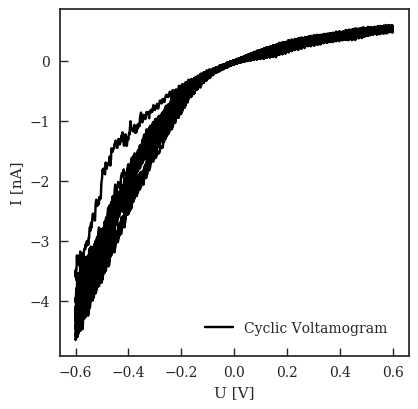

In [13]:
cv = CV(datadir = "S:/UsersData/Martin/2019/03_Mar/14/sicm/cv1",
        exp_name = "cv1")
# this is very simplistic but does the job for now.
cv.plot()

------------------
# Not used anymore

## Cyclic Voltametry

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

import sys
sys.path.append("..")

from sicm import io, analysis, utils
from sicm.plots import plots

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [8]:
# vars
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
exp_name = "cv2"

In [9]:
files, date = io.get_files(datadir, exp_name)
result = io.load_result(files)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

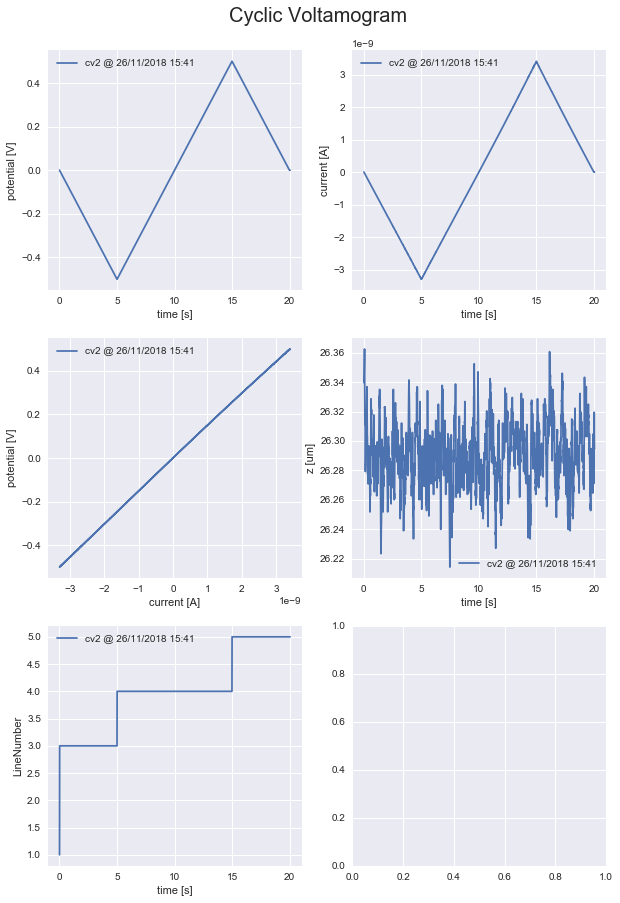

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))